In [1]:
from maze import MazeGenerator
from path_generator import PathGenerator
from genetic_algorithm import GeneticAlgorithm
from path_genetic import fitness, mutation, crossover
import matplotlib.pyplot as plt
import numpy as np

In [2]:
EPOCHS = 1000
POPULATION = 50
DIM = 21

In [3]:
maze_gen = MazeGenerator(DIM, DIM)
maze_matrix = maze_gen.get_maze()
entry_position = maze_gen.get_entry()
exit_position = maze_gen.get_exit()
checkpoints = maze_gen.get_checkpoints()

maze_dic = {
        "matrix": maze_matrix,
        "entry": entry_position,
        "exit": exit_position,
        "checkpoints": checkpoints
}

In [4]:
# Generar una población de caminos inicial
path_gen = PathGenerator(maze_matrix, entry_position)
path_gen.generate_paths(POPULATION)
paths = path_gen.get_paths()

# Aplicar el algoritmo genético para encontrar la solución
genetic = GeneticAlgorithm(paths, maze_dic, EPOCHS, POPULATION, fitness, crossover, mutation)
generations, fitness_history = genetic.run()

C:\Users\diego\AppData\Local\Temp\ipykernel_24984\3954418197.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


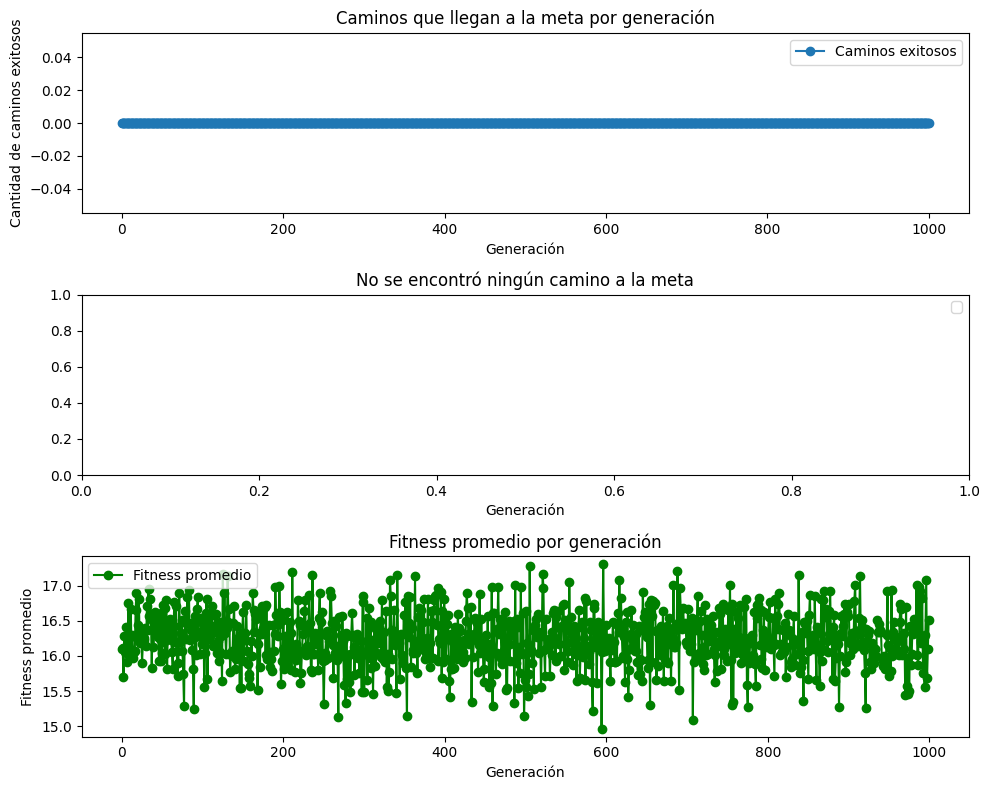

In [5]:
# Variables de laberinto y meta
maze_size = (DIM, DIM)
goal_position = (maze_size[0] - 1, maze_size[1] - 1)

# 1. Caminos que llegan a la meta por generación
successful_paths = [
    sum(1 for path in generation if path[-1] == goal_position) 
    for generation in generations
]

# 2. Primera generación con al menos un camino solucionador
first_solution_generation = next((i for i, generation in enumerate(generations) 
                                  if any(path[-1] == goal_position for path in generation)), None)

# 3. Fitness promedio por generación
avg_fitness_per_generation = [np.mean(fitness) for fitness in fitness_history]

# Gráficos
plt.figure(figsize=(10, 8))

# Gráfico de caminos exitosos por generación
plt.subplot(3, 1, 1)
plt.plot(successful_paths, marker='o', label="Caminos exitosos")
plt.title("Caminos que llegan a la meta por generación")
plt.xlabel("Generación")
plt.ylabel("Cantidad de caminos exitosos")
plt.legend()

# Gráfico de primera generación con solución
plt.subplot(3, 1, 2)
if first_solution_generation is not None:
    plt.axvline(x=first_solution_generation, color="red", linestyle="--", label=f"Primera generación con solución ({first_solution_generation})")
    plt.title(f"Primera generación con al menos un camino a la meta: {first_solution_generation}")
else:
    plt.title("No se encontró ningún camino a la meta")
plt.xlabel("Generación")
plt.legend()

# Gráfico de fitness promedio por generación
plt.subplot(3, 1, 3)
plt.plot(avg_fitness_per_generation, marker='o', color="green", label="Fitness promedio")
plt.title("Fitness promedio por generación")
plt.xlabel("Generación")
plt.ylabel("Fitness promedio")
plt.legend()

plt.tight_layout()
plt.show()
